The primary aim of this analysis focuses on predicting housing prices. 
The initial dataset consists of housing-related information with the following features:

SquareFeet: The total square footage of the property.
Bedrooms: The number of bedrooms in the property.
Bathrooms: The number of bathrooms in the property.
Neighborhood: The neighborhood where the property is located.
YearBuilt: The year the property was built.
Price: The target variable representing the price of the property.

The dataset contains 50,000 entries with no missing values, and it includes a mix of numerical and categorical features.

Importing libraries:


In [47]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import sys

import tensorflow.keras as keras
import tensorflow as tf
import platform

print(f"Python {sys.version}")
print(f"Python Platform: {platform.platform()}")
print(f"Tensor Flow Version: {tf.__version__}")

import seaborn as sns
import matplotlib.pyplot as plt

Python 3.11.6 | packaged by conda-forge | (main, Oct  3 2023, 10:37:07) [Clang 15.0.7 ]
Python Platform: macOS-14.0-arm64-arm-64bit
Tensor Flow Version: 2.15.0


Loading the housing price dataset into a Pandas DataFrame named df:

In [2]:
df = pd.read_csv('housing_price_dataset.csv')

Display the first few rows of the dataset:

In [3]:
df.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065


Display the last few rows of the dataset:

In [4]:
df.tail()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
49995,1282,5,3,Rural,1975,100080.865895
49996,2854,2,2,Suburb,1988,374507.656727
49997,2979,5,3,Suburb,1962,384110.555590
49998,2596,5,2,Rural,1984,380512.685957
49999,1572,5,3,Rural,2011,221618.583218


Number of Entries: 50,000
Features (Columns): SquareFeet, Bedrooms, Bathrooms, Neighborhood, YearBuilt, Price.
Data Types: int64 (4 columns), float64 (1 column), object (1 column)

Summary of the DataFrame. This will output details about the columns, data types, and the number of non-null entries:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  object 
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB


The describe() method provides statistical summaries of the numerical columns in the DataFrame, including count, mean, standard deviation, minimum, 25th percentile, median (50th percentile), 75th percentile and maximum values.

In [6]:
df.describe()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2006.374680,3.498700,1.995420,1985.404420,224827.325151
std,575.513241,1.116326,0.815851,20.719377,76141.842966
min,1000.000000,2.000000,1.000000,1950.000000,-36588.165397
25%,1513.000000,3.000000,1.000000,1967.000000,169955.860225
50%,2007.000000,3.000000,2.000000,1985.000000,225052.141166
75%,2506.000000,4.000000,3.000000,2003.000000,279373.630052
max,2999.000000,5.000000,3.000000,2021.000000,492195.259972


The isnull().sum() method is used to count the number of missing values in each column of the DataFrame. There are no missing values.

In [7]:
df.isnull().sum()

SquareFeet      0
Bedrooms        0
Bathrooms       0
Neighborhood    0
YearBuilt       0
Price           0
dtype: int64

The duplicated().sum() method is used to count the number of duplicated rows in the DataFrame.

In [8]:
df.duplicated().sum()

0

Data preparation and exploratory data analysis.

Visualize the distribution of the target variable (Price) and explore the relationship between SquareFeet and Price.

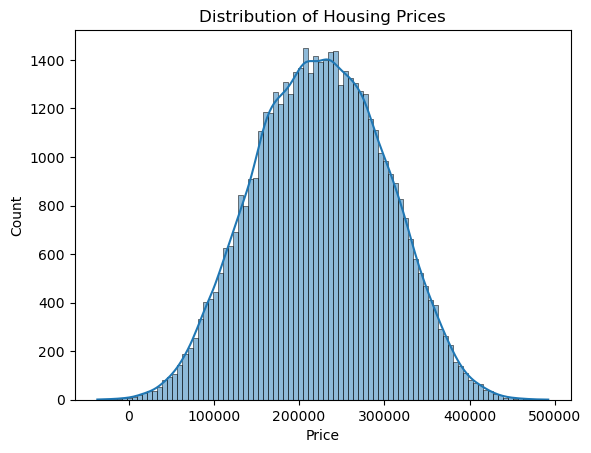

In [9]:
sns.histplot(df['Price'], kde=True)
plt.title('Distribution of Housing Prices')
plt.show()

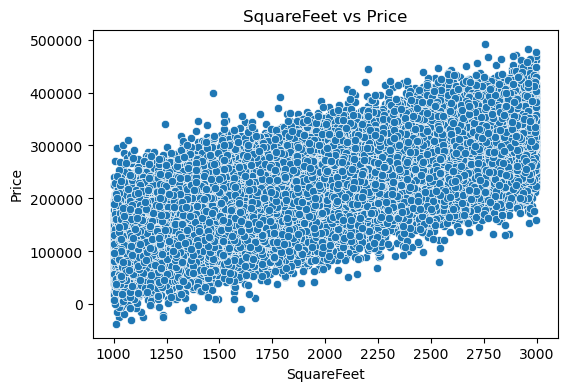

In [10]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='SquareFeet', y='Price', data=df)
plt.title('SquareFeet vs Price')
plt.show()

Mapping the column ('Neighborhood') from text values to numerical values. This is a common preprocessing step when dealing with categorical variables in machine learning models.

In [11]:
neighborhood_mapping = {'Rural': 0, 'Suburb': 1, 'Urban': 2}

df['Neighborhood'] = df['Neighborhood'].map(neighborhood_mapping)

display(df)

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,0,1969,215355.283618
1,2459,3,2,0,1980,195014.221626
2,1860,2,1,1,1970,306891.012076
3,2294,2,1,2,1996,206786.787153
4,2130,5,2,1,2001,272436.239065
...,...,...,...,...,...,...
49995,1282,5,3,0,1975,100080.865895
49996,2854,2,2,1,1988,374507.656727
49997,2979,5,3,1,1962,384110.555590
49998,2596,5,2,0,1984,380512.685957


Now the 'Neighborhood' column contains numerical values (0 for 'Rural', 1 for 'Suburb', and 2 for 'Urban').

A heatmap or correlation matrix is a useful tool for identifying relationships between variables.

Positive Correlation: Values close to 1 indicate a strong positive correlation, meaning that as one variable increases, the other is likely to increase as well.

Negative Correlation: Values close to -1 indicate a strong negative correlation, meaning that as one variable increases, the other is likely to decrease.

Correlation Close to 0: Values close to 0 indicate a weak or no linear correlation.

In [49]:
corr_matrix = df.corr()

display(corr_matrix)

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
SquareFeet,1.000000,-0.002638,-0.003275,0.011186,0.000482,0.750720
Bedrooms,-0.002638,1.000000,0.007405,-0.004208,0.003147,0.072624
Bathrooms,-0.003275,0.007405,1.000000,0.001613,0.003748,0.028418
Neighborhood,0.011186,-0.004208,0.001613,1.000000,-0.000174,0.016429
YearBuilt,0.000482,0.003147,0.003748,-0.000174,1.000000,-0.002288
Price,0.750720,0.072624,0.028418,0.016429,-0.002288,1.000000


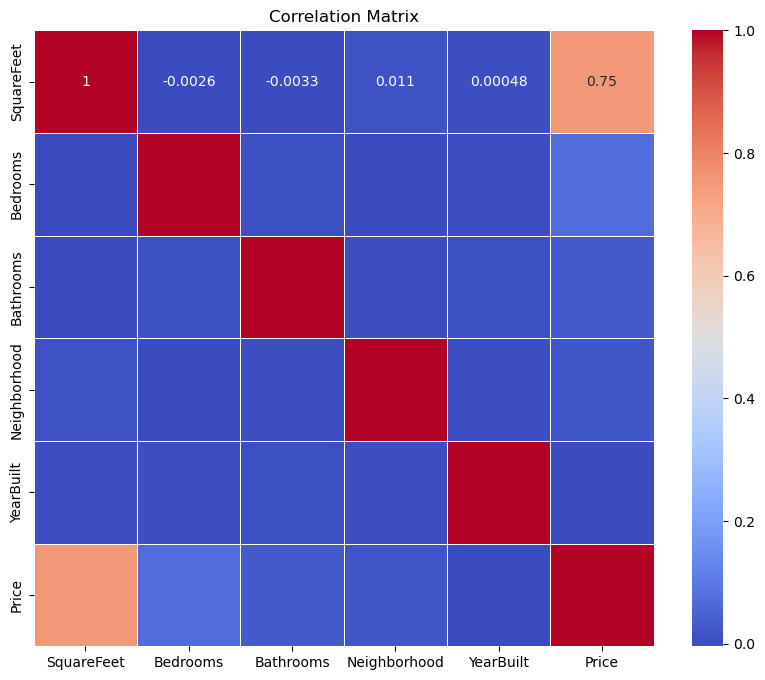

In [50]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

There is a strong positive correlation of approximately 0.75 between 'SquareFeet' and 'Price.' This suggests that as the square footage of a property increases, the price tends to increase as well.

In [13]:
corr_matrix.at['SquareFeet', 'Price']

0.7507197856708845

Preparing the data for a machine learning model. First of all, the outliers need to be removed.

In [14]:
# Calculate the IQR for each column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define a function to filter outliers based on IQR
def remove_outliers(df, columns, threshold=1.5):
    filtered_df = df.copy()
    for column in columns:
        lower_bound = Q1[column] - threshold * IQR[column]
        upper_bound = Q3[column] + threshold * IQR[column]
        filtered_df = filtered_df[(filtered_df[column] >= lower_bound) & (filtered_df[column] <= upper_bound)]
    return filtered_df

# Specify columns to consider (excluding 'Neighborhood' as it's now numerical)
columns_to_check = ['SquareFeet', 'Bedrooms', 'Bathrooms', 'YearBuilt', 'Price']

data = remove_outliers(df, columns_to_check)

print('Shape of dataset after removing outliers:', data.shape)

Shape of dataset after removing outliers: (49941, 6)


The next steps are crucial for ensuring that the machine learning model receives appropriately scaled data and that there are separate training and testing sets to evaluate its performance.

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Feature and Target Variable Separation:
X = data.drop('Price', axis=1)  # Features (all columns except 'Price')
y = data['Price']  # Target variable ('Price')

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X , y,
                                                    shuffle = True,
                                                    test_size=0.2,
                                                    random_state=1)
#Standard Scaling:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display the Shapes of Sets:
print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of testing label:', y_test.shape)

Shape of training feature: (39952, 5)
Shape of testing feature: (9989, 5)
Shape of training label: (39952,)
Shape of testing label: (9989,)


These shapes are suitable for training and evaluating machine learning models.
Now everything it's ready to train machine learning models on the training data and evaluate their performance on the testing data.

Model Selection: The choice of the machine learning model depends on the nature of the prediction task (regression, classification, etc.) and the characteristics of the data. Different models have different strengths and weaknesses.
Here are a Linear Regression model, a Random Forest model and a Decision Tree model, trained on the scaled training data (X_train_scaled, y_train), and the predictions on the scaled testing data (X_test_scaled). 

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.tree import DecisionTreeRegressor

model_list = [LinearRegression() , DecisionTreeRegressor(), RandomForestRegressor()]
model_list1 = []
R2_score = []
mae = [] 
mape = []
mse = []

for model in model_list:
    model_list1.append(str(model)[0:-2])
    model.fit(X_train_scaled , y_train)
    y_pred = model.predict(X_test_scaled) 
    R2_score.append(round(r2_score(y_test , y_pred) , 2))
    mae.append(round(mean_absolute_error(y_test , y_pred) , 2))
    mape.append(round(mean_absolute_percentage_error(y_test , y_pred) , 2))
    mse.append(round(mean_squared_error(y_test , y_pred) , 2))

dict = {'Model':model_list1, 'R2_score':R2_score , 'MAPE':mape , 'MAE':mae , 'MSE':mse}
model_df = pd.DataFrame(dict).sort_values(ascending = False , by = 'R2_score')

model_df

,Model,R2_score,MAPE,MAE,MSE
0,LinearRegression,0.57,0.23,39462.47,2.437666e+09
2,RandomForestRegressor,0.52,0.25,41903.63,2.748575e+09
1,DecisionTreeRegressor,0.08,0.32,57816.56,5.195645e+09


I tried with tree different algorithms since the values were different.

Neural networks for the data analysis.
Setting up the environment to use TensorFlow for building a neural network model using Keras.

In [19]:
from keras import layers

from tensorflow.keras.layers import InputLayer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import os

# Ignore TensorFlow warning about Metal device
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

Set up a Multi-Layer Perceptron (MLP) model with three layers (input layer, hidden layer with 128 units, another hidden layer with 64 units, and an output layer with 1 unit). 
The model is compiled using the Adam optimizer and mean squared error loss. It's trained on the scaled training data for 50 epochs with a batch of 32 and a validation split of 20%.

In [20]:
mlp_model = Sequential()

mlp_model.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'))
mlp_model.add(Dense(64, activation='relu'))
mlp_model.add(Dense(1, activation='linear'))

mlp_model.compile(optimizer='adam', loss='mean_squared_error')

mlp_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
999/999 [==============================] - 7s 5ms/step - loss: 53748629504.0000 - val_loss: 46855843840.0000
Epoch 2/50
999/999 [==============================] - 4s 4ms/step - loss: 33869551616.0000 - val_loss: 21750206464.0000
Epoch 3/50
999/999 [==============================] - 4s 4ms/step - loss: 15407940608.0000 - val_loss: 9350940672.0000
Epoch 4/50
999/999 [==============================] - 4s 4ms/step - loss: 5576912896.0000 - val_loss: 3029550592.0000
Epoch 5/50
999/999 [==============================] - 4s 4ms/step - loss: 2653863680.0000 - val_loss: 2503416832.0000
Epoch 6/50
999/999 [==============================] - 4s 4ms/step - loss: 2476810240.0000 - val_loss: 2500397824.0000
Epoch 7/50
999/999 [==============================] - 4s 4ms/step - loss: 2473604352.0000 - val_loss: 2499293696.0000
Epoch 8/50
999/999 [==============================] - 4s 4ms/step - loss: 2473792000.0000 - val_loss: 2503464192.0000
Epoch 9/50
999/999 [==============================]

Evaluate the trained MLP model and print the loss. The loss provides a measure of how well the MLP model performs.

In [21]:
# Evaluate the MLP model on the test set
mlp_loss = mlp_model.evaluate(X_test_scaled, y_test)

print(f'MLP Model - Loss on Test Set: {mlp_loss}')

313/313 [==============================] - 1s 3ms/step - loss: 2441037568.0000
MLP Model - Loss on Test Set: 2441037568.0


Set up an LSTM (Long Short-Term Memory) model that model includes an LSTM layer with 50 units and a Dense layer with 1 unit for regression. The model is compiled using the Adam optimizer and mean squared error loss. It's trained on the reshaped training data for 50 epochs with a batch size of 32 and a validation split of 20%.

In [22]:
from tensorflow.keras.layers import LSTM

X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))

lstm_model = Sequential()

# Add LSTM layer to the model
lstm_model.add(LSTM(50, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]), activation='tanh'))
lstm_model.add(Dense(1, activation='linear'))

# Compile the model
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model on the reshaped training data
lstm_model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
999/999 [==============================] - 11s 9ms/step - loss: 56213934080.0000 - val_loss: 56192786432.0000
Epoch 2/50
999/999 [==============================] - 7s 7ms/step - loss: 56188502016.0000 - val_loss: 56165781504.0000
Epoch 3/50
999/999 [==============================] - 7s 7ms/step - loss: 56164245504.0000 - val_loss: 56144015360.0000
Epoch 4/50
999/999 [==============================] - 7s 7ms/step - loss: 56143691776.0000 - val_loss: 56124391424.0000
Epoch 5/50
999/999 [==============================] - 7s 7ms/step - loss: 56124588032.0000 - val_loss: 56105734144.0000
Epoch 6/50
999/999 [==============================] - 7s 7ms/step - loss: 56106151936.0000 - val_loss: 56087597056.0000
Epoch 7/50
999/999 [==============================] - 7s 7ms/step - loss: 56088117248.0000 - val_loss: 56069722112.0000
Epoch 8/50
999/999 [==============================] - 7s 7ms/step - loss: 56070377472.0000 - val_loss: 56051982336.0000
Epoch 9/50
999/999 [===================

The loss provides a measure of how well the LSTM model performs.

In [23]:
# Reshape the input test data for LSTM (assuming X_test_scaled has 3D shape)
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Evaluate the LSTM model on the reshaped test set
lstm_loss = lstm_model.evaluate(X_test_reshaped, y_test)

# Print the loss on the test set
print(f'LSTM Model - Loss on Test Set: {lstm_loss}')

313/313 [==============================] - 1s 4ms/step - loss: 55652974592.0000
LSTM Model - Loss on Test Set: 55652974592.0


To estimate the prediction accuracy on the training and test sets, the trained models are used and their performance on both sets is evaluated.

In [24]:
mlp_train_predictions = mlp_model.predict(X_train_scaled)
mlp_test_predictions = mlp_model.predict(X_test_scaled)

# Evaluate the performance using regression metrics
mae_mlp_train = mean_absolute_error(y_train, mlp_train_predictions)
mse_mlp_train = mean_squared_error(y_train, mlp_train_predictions)
rmse_mlp_train = np.sqrt(mse_mlp_train)

mae_mlp_test = mean_absolute_error(y_test, mlp_test_predictions)
mse_mlp_test = mean_squared_error(y_test, mlp_test_predictions)
rmse_mlp_test = np.sqrt(mse_mlp_test)

print('Multilayer Perceptron Model:')
print('Training Set:')
print(f'Mean Absolute Error: {mae_mlp_train}')
print(f'Mean Squared Error: {mse_mlp_train}')
print(f'Root Mean Squared Error: {rmse_mlp_train}')

print('\nTesting Set:')
print(f'Mean Absolute Error: {mae_mlp_test}')
print(f'Mean Squared Error: {mse_mlp_test}')
print(f'Root Mean Squared Error: {rmse_mlp_test}')

313/313 [==============================] - 0s 1ms/step
Multilayer Perceptron Model:
Training Set:
Mean Absolute Error: 39868.24989884042
Mean Squared Error: 2479497584.73329
Root Mean Squared Error: 49794.553765781355

Testing Set:
Mean Absolute Error: 39492.61993562332
Mean Squared Error: 2441037869.7406087
Root Mean Squared Error: 49406.86055337466


Predictions using the LSTM model on both the reshaped training and testing data and calculated regression metrics to evaluate its performance.

In [25]:
lstm_train_predictions = lstm_model.predict(X_train_reshaped)
lstm_test_predictions = lstm_model.predict(X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1])))

mae_lstm_train = mean_absolute_error(y_train, lstm_train_predictions)
mse_lstm_train = mean_squared_error(y_train, lstm_train_predictions)
rmse_lstm_train = np.sqrt(mse_lstm_train)

mae_lstm_test = mean_absolute_error(y_test, lstm_test_predictions)
mse_lstm_test = mean_squared_error(y_test, lstm_test_predictions)
rmse_lstm_test = np.sqrt(mse_lstm_test)

print('Long Short-Term Memory Network (LSTM) Model:')
print('Training Set:')
print(f'Mean Absolute Error: {mae_lstm_train}')
print(f'Mean Squared Error: {mse_lstm_train}')
print(f'Root Mean Squared Error: {rmse_lstm_train}')

print('\nTesting Set:')
print(f'Mean Absolute Error: {mae_lstm_test}')
print(f'Mean Squared Error: {mse_lstm_test}')
print(f'Root Mean Squared Error: {rmse_lstm_test}')

313/313 [==============================] - 1s 2ms/step
Long Short-Term Memory Network (LSTM) Model:
Training Set:
Mean Absolute Error: 222648.21088290095
Mean Squared Error: 55327711762.05976
Root Mean Squared Error: 235218.43414592269

Testing Set:
Mean Absolute Error: 223553.34302278186
Mean Squared Error: 55652990201.27637
Root Mean Squared Error: 235908.8599465403


Compare the performance of the Multilayer Perceptron (MLP) and Long Short-Term Memory Network (LSTM) models on the testing set. 
Visualize the predictions vs actual values.

Multilayer Perceptron Model:
Mean Absolute Error: 39492.61993562332
Mean Squared Error: 2441037869.7406087
Root Mean Squared Error: 49406.86055337466

Long Short-Term Memory Network (LSTM) Model:
Mean Absolute Error: 223553.34302278186
Mean Squared Error: 55652990201.27637
Root Mean Squared Error: 235908.8599465403


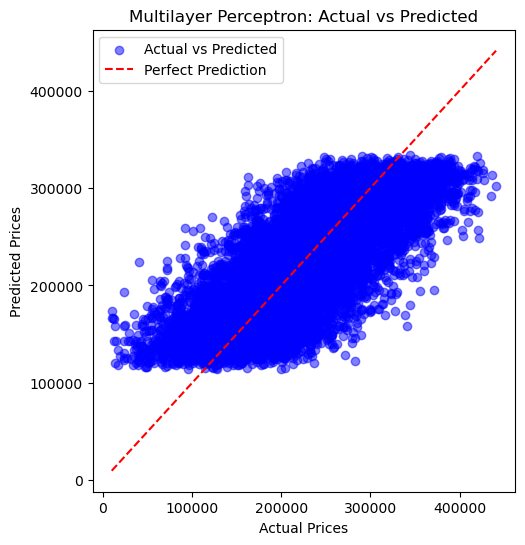

In [29]:
print('Multilayer Perceptron Model:')
print(f'Mean Absolute Error: {mae_mlp_test}')
print(f'Mean Squared Error: {mse_mlp_test}')
print(f'Root Mean Squared Error: {rmse_mlp_test}')

print('\nLong Short-Term Memory Network (LSTM) Model:')
print(f'Mean Absolute Error: {mae_lstm_test}')
print(f'Mean Squared Error: {mse_lstm_test}')
print(f'Root Mean Squared Error: {rmse_lstm_test}')

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, mlp_test_predictions, alpha=0.5, label='Actual vs Predicted', color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Multilayer Perceptron: Actual vs Predicted')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()

Choosing the right method for analysis depends on the nature of the dataset and the specific goals of the analysis. Both Multilayer Perceptron (MLP) and Long Short-Term Memory Network (LSTM) are powerful techniques, but their effectiveness can vary based on the characteristics of the data. Here are some of my considerations:
The size of the dataset can influence model performance.
Both models need tuning, adjusting the number of layers, units per layer, learning rate, etc., can impact performance.